In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:04<00:00, 152MB/s]
100% 715M/715M [00:05<00:00, 148MB/s]


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 23.4 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [10]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [11]:
filenames=os.listdir('/content/train')

In [12]:
type(filenames)

list

In [13]:
len(filenames)

50000

In [14]:
print(filenames[0:5])

['40973.png', '30939.png', '13731.png', '30006.png', '7966.png']


In [15]:
labels_df=pd.read_csv('/content/trainLabels.csv')

In [16]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
labels_df.shape

(50000, 2)

In [18]:
labels_df[labels_df['id']==40973]

,id,label
40972,40973,automobile


In [19]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [20]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [21]:
label_dict={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

In [22]:
labels=[label_dict[i] for i in labels_df['label']]

In [23]:
print(labels[0:5])

[6, 9, 9, 4, 1]


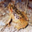

In [24]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [25]:
labels_df[labels_df['id']==7796]

,id,label
7795,7796,frog


In [26]:
id_list=list(labels_df['id'])

In [27]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [28]:
# convert images to numpy arrays
train_data='/content/train/'
data=[]
for id in id_list:
  image=Image.open(train_data + str(id) + '.png')
  image=np.array(image)
  data.append(image)

In [29]:
type(data)

list

In [30]:
len(data)

50000

In [31]:
type(data[0])

numpy.ndarray

In [32]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
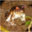

In [33]:
data[0]

In [34]:
X=np.array(data)
y=np.array(labels)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (35000, 32, 32, 3) (15000, 32, 32, 3)


In [37]:
X_train=X_train/255
X_test=X_test/255

In [38]:
X_train

array([[[[0.22745098, 0.08235294, 0.05490196],
         [0.24705882, 0.09803922, 0.0627451 ],
         [0.29019608, 0.1372549 , 0.08627451],
         ...,
         [0.25490196, 0.08627451, 0.0745098 ],
         [0.18823529, 0.03137255, 0.01568627],
         [0.38039216, 0.31372549, 0.30588235]],

        [[0.23921569, 0.09803922, 0.07058824],
         [0.25490196, 0.10980392, 0.07058824],
         [0.30980392, 0.16078431, 0.10980392],
         ...,
         [0.34901961, 0.22352941, 0.20784314],
         [0.15686275, 0.02745098, 0.00784314],
         [0.36470588, 0.31372549, 0.30196078]],

        [[0.23529412, 0.10196078, 0.0745098 ],
         [0.23921569, 0.09803922, 0.0627451 ],
         [0.28627451, 0.1372549 , 0.09411765],
         ...,
         [0.42745098, 0.34901961, 0.32941176],
         [0.12941176, 0.03137255, 0.01176471],
         [0.34117647, 0.30588235, 0.29019608]],

        ...,

        [[0.49803922, 0.44705882, 0.42352941],
         [0.45098039, 0.4       , 0.36078431]

In [39]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D

In [40]:
models=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
models.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [42]:
models.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.2447 - loss: 2.0847 - val_acc: 0.3311 - val_loss: 1.8541
Epoch 2/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.3246 - loss: 1.8697 - val_acc: 0.3589 - val_loss: 1.7952
Epoch 3/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.3358 - loss: 1.8280 - val_acc: 0.3323 - val_loss: 1.8266
Epoch 4/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - acc: 0.3516 - loss: 1.7952 - val_acc: 0.3497 - val_loss: 1.7931
Epoch 5/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.3569 - loss: 1.7790 - val_acc: 0.3334 - val_loss: 1.8116
Epoch 6/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.3658 - loss: 1.7715 - val_acc: 0.3683 - val_loss: 1.7534
Epoch 7/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - acc: 0.3603 - loss: 1.7797 - val_acc: 0.3769 - val_loss: 1.7408
Epoch 8/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.3705 - loss: 1.7536 - val_acc: 0.3751 - val_loss: 1.7451
Epoch 9/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - a

In [45]:
loss, accuracy = models.evaluate(X_test, y_test)
print('Test Accuracy =', accuracy)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.3650 - loss: 1.7698
Test Accuracy = 0.3651333451271057


CNN

In [47]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(2,2),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [49]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.3593 - loss: 1.7580 - val_accuracy: 0.5371 - val_loss: 1.3082
Epoch 2/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.5643 - loss: 1.2452 - val_accuracy: 0.5517 - val_loss: 1.2751
Epoch 3/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.6096 - loss: 1.1119 - val_accuracy: 0.5986 - val_loss: 1.1638
Epoch 4/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.6445 - loss: 1.0151 - val_accuracy: 0.6009 - val_loss: 1.1396
Epoch 5/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.6748 - loss: 0.9435 - val_accuracy: 0.6051 - val_loss: 1.1302
Epoch 6/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.6899 - loss: 0.8866 - val_accuracy: 0.6071 - val_loss: 1.1436
Epoch 7/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.7115 - loss: 0.8263 - val_accuracy: 0.5989 - val_loss: 1.1948
Epoch 8/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.7361 - loss: 0.7678 - 

In [52]:
loss,accuracy=model.evaluate(X_test,y_test)
print('Test Accuracy =', accuracy)

469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6199 - loss: 1.1283
Test Accuracy = 0.6217333078384399


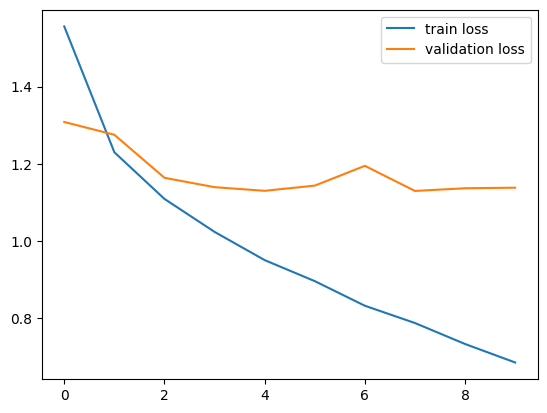

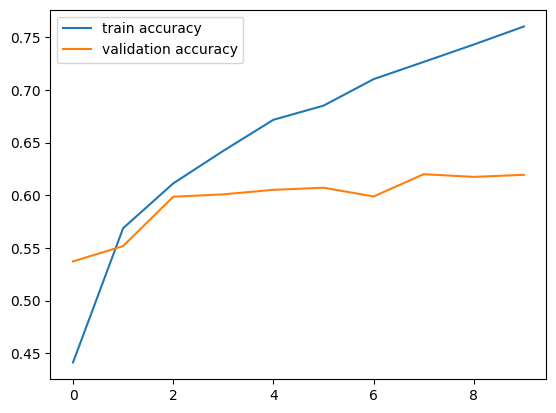

In [54]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()